# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  1.0.1


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# DONE
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2053062
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [61 61 63 52 59 65 45 75 54 65]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [61 61 63 52 59 65 45 75 54 65]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


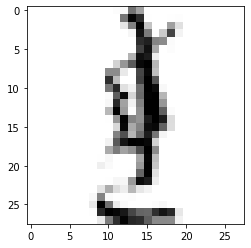

LABEL: 8
INPUT:


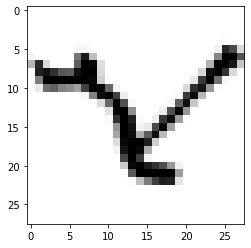

LABEL: 9
INPUT:


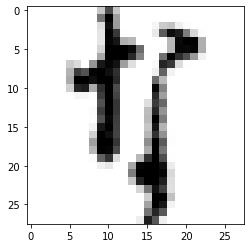

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### DONE 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (50,), (20,20,), (50,50,), (40,20,10) ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

gsearch = GridSearchCV(mlp, parameters, cv=5)
gsearch.fit(X_train,y_train)

print ('RESULTS FOR NN')
cvres = pd.DataFrame.from_dict(gsearch.cv_results_)
print(cvres)

print("\nBest parameters set found:")
display(gsearch.best_params_)

print("\nScore with best parameters:")
display(gsearch.best_score_)

print("\nAll scores on the grid:")
display(cvres.loc[:,["params","mean_test_score"]])

RESULTS FOR NN
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.186641      0.017793         0.000492        0.000027   
1       0.199832      0.022865         0.000632        0.000205   
2       0.246907      0.012883         0.000671        0.000163   
3       0.245098      0.006388         0.000691        0.000093   
4       0.140779      0.006254         0.000524        0.000011   
5       0.201584      0.025806         0.000726        0.000108   
6       0.286694      0.042659         0.000703        0.000088   

  param_hidden_layer_sizes                                params  \
0                    (10,)         {'hidden_layer_sizes': (10,)}   
1                    (20,)         {'hidden_layer_sizes': (20,)}   
2                    (40,)         {'hidden_layer_sizes': (40,)}   
3                    (50,)         {'hidden_layer_sizes': (50,)}   
4                 (20, 20)      {'hidden_layer_sizes': (20, 20)}   
5                 (50, 50)      {'hidden

{'hidden_layer_sizes': (50,)}


Score with best parameters:


0.7616666666666666


All scores on the grid:


,params,mean_test_score
0,"{'hidden_layer_sizes': (10,)}",0.721667
1,"{'hidden_layer_sizes': (20,)}",0.728333
2,"{'hidden_layer_sizes': (40,)}",0.751667
3,"{'hidden_layer_sizes': (50,)}",0.761667
4,"{'hidden_layer_sizes': (20, 20)}",0.728333
5,"{'hidden_layer_sizes': (50, 50)}",0.736667
6,"{'hidden_layer_sizes': (40, 20, 10)}",0.705000


### DONE 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 8, 16, 32, 60, 120, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1,
                    hidden_layer_sizes=(50,))

# recall to use cv=kf to use the k-fold subdivision seen in the lectures
gsearch = GridSearchCV(mlp, parameters, cv=kf)
gsearch.fit(X_train,y_train)

print ('RESULTS FOR NN\n')
cvres = pd.DataFrame.from_dict(gsearch.cv_results_)
print(cvres)

print("Best parameters set found:")
display(gsearch.best_params_)

print("Score with best parameters:")
display(gsearch.best_score_)

print("\nAll scores on the grid:")
display(cvres.loc[:,["params","mean_test_score"]])

/Users/paolozinesi/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/paolozinesi/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/paolozinesi/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/paolozinesi/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/paolozine

RESULTS FOR NN

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      15.088304      1.820565         0.000687        0.000067   
1       0.656017      0.220891         0.000760        0.000122   
2       0.513534      0.307134         0.000752        0.000146   
3       0.345061      0.021472         0.000933        0.000348   
4       0.275818      0.023200         0.000665        0.000101   
5       0.237681      0.006247         0.000598        0.000003   
6       0.286353      0.014289         0.000970        0.000148   

  param_batch_size               params  split0_test_score  split1_test_score  \
0                1    {'batch_size': 1}           0.141667           0.091667   
1                8    {'batch_size': 8}           0.433333           0.325000   
2               16   {'batch_size': 16}           0.716667           0.700000   
3               32   {'batch_size': 32}           0.750000           0.808333   
4               60   {'batch_size': 60}   

{'batch_size': 60}

Score with best parameters:


0.7683333333333333


All scores on the grid:


,params,mean_test_score
0,{'batch_size': 1},0.123333
1,{'batch_size': 8},0.396667
2,{'batch_size': 16},0.701667
3,{'batch_size': 32},0.760000
4,{'batch_size': 60},0.768333
5,{'batch_size': 120},0.763333
6,{'batch_size': 480},0.760000


### QUESTION 1 (DONE)

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

**We get the best results with a single-layer architecture. With more than one layer the performance drops because the model gets too complicated. However, the best results are obtained with the maximum number of neurons (50) in the single layer. <br>
With respect to the batch size, batch sizes of 1 and 480 does not lead to convergence, even if it happens for different reasons. For `batch_size=1` the algorithm does not converge because it's too unstable and the test score is near to 0, while for `batch_size=480` the algorithm does not converge in the 100 maximum iterations (I suppose it is because after 100 iterations the precision is not below the threshold) but still gets a result close to the optimal one of `batch_size=60`.**

### DONE 3

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (8,) ...


/Users/paolozinesi/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.30 sec

Training MLP of size (10,) ...
Done, training time: 0.25 sec

Training MLP of size (20,) ...
Done, training time: 0.25 sec

Training MLP of size (40,) ...
Done, training time: 0.31 sec

Training MLP of size (50,) ...
Done, training time: 0.34 sec

Training MLP of size (20, 20) ...
Done, training time: 0.19 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 0.35 sec



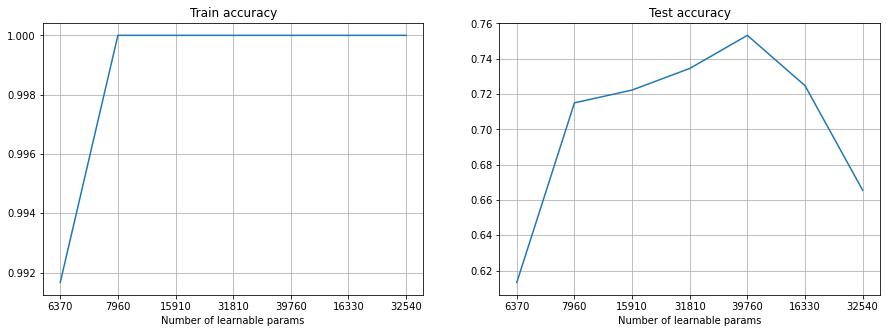

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(8,), (10,), (20,), (40,), (50,), (20,20,), (40,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        learning_rate_init=.1,
                        hidden_layer_sizes=hl_size)
    
    mlp.fit(X_train,y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2 (DONE)

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

**Considering the case with `hidden_layer_size=(8,)` it is possible to see that the training accuracy is 1 for almost all the hidden layer sizes, except for the configuration with the lowest number of learnable parameters. It means that in most of the cases the algorithm fits perfectly the training data, but we are not able to tell if the model will generalize well. This property is checked by the test accuracy plot, which presents a maximum for a particular number of learnable parameters, while other number of parameters present a slightly less test accuracy. <br>
Overall, we can claim that the architecture with `hidden_layer_size=(50,)` that has `39760` parameters is the one with best test accuracy. We recall that this is also the best architecture found by the cross-validation procedure (over the training data).**

### DONE 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

/Users/paolozinesi/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


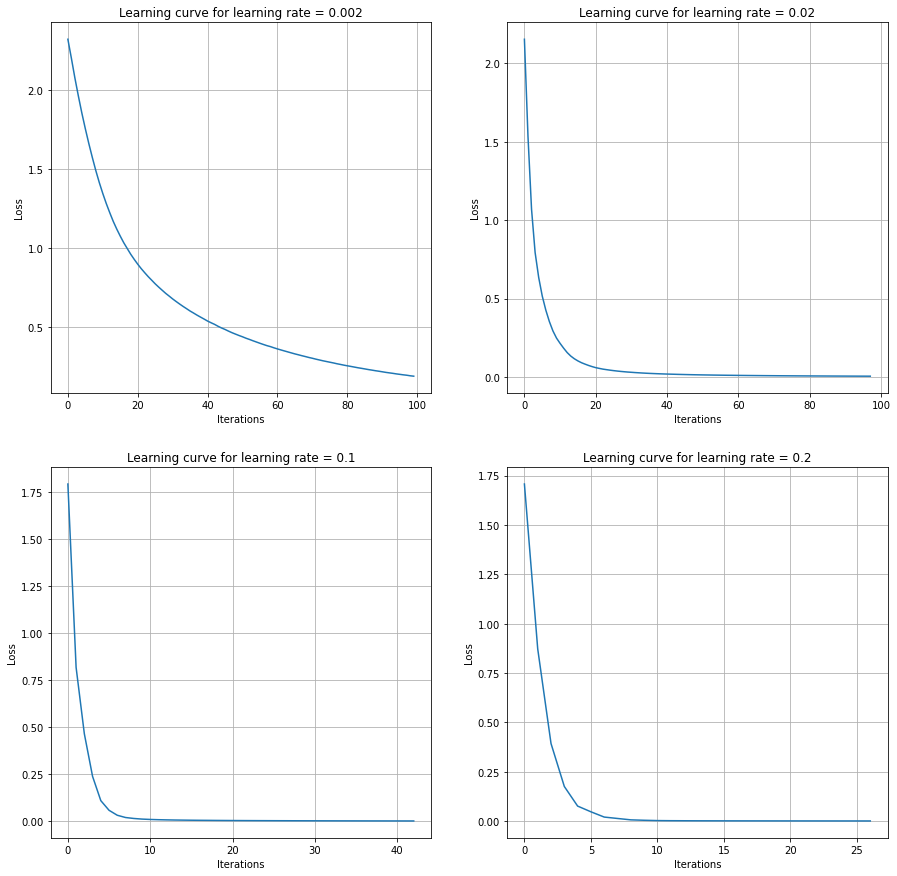

RESULTS FOR NN

Best parameters set found (for the test scores):
{'learning_rate': 0.2}

(Test) Score with best parameters:
0.76125

All (test) scores on the grid:
{'0.002': 0.75025, '0.02': 0.75425, '0.1': 0.74825, '0.2': 0.76125}


In [11]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.002, 0.02, 0.1, 0.2]
scores = {}
fig, axs = plt.subplots(2,2, figsize=(15,15))
                       

for lr,ax in zip(lr_list, axs.ravel()):
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        hidden_layer_sizes=(50,), batch_size=60,
                        learning_rate_init=lr)
    
    # fit and update scores list
    mlp.fit(X_train,y_train)
    scores.update({str(lr):mlp.score(X_test, y_test)})
    
    # plot learning curves
    ax.plot(mlp.loss_curve_)
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss')
    ax.set_title('Learning curve for learning rate = '+str(lr))
    ax.grid(True)


plt.show()
print ('RESULTS FOR NN\n')


print("Best parameters set found (for the test scores):")
print({"learning_rate": float(max(scores, key=scores.get))})

print("\n(Test) Score with best parameters:")
print(max(scores.values()))

print("\nAll (test) scores on the grid:")
print(scores)


### QUESTION 3 (DONE)

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

**With `learning_rate=0.002` the convergence is very slow because the stepsizes are too small, in 100 iterations the algorithm does not reach the convergence. With `learning_rate=0.02` the convergence is reached in 100 iterations and the learning curve is smooth due to the small stepsize. With `learning_rate=0.1` and `learning_rate=0.2` the convergence is reached in less than 50 iterations (respectively ~40 and ~25 iterations) but the loss curve is not very smooth. However, this is not a problem because of the high batch size (`batch_size=60`) that adds stability to the algorithm.**

### DONE 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.238750


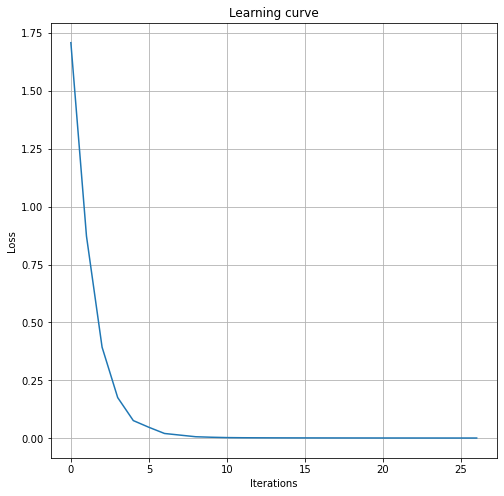

In [12]:
# get training and test error for the best NN model from CV
mlp = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    hidden_layer_sizes=(50,), batch_size=60,
                    learning_rate_init=0.2)

mlp.fit(X_train, y_train)

print ('\nRESULTS FOR BEST NN\n')

training_error = 1 - mlp.score(X_train, y_train)
test_error = 1 - mlp.score(X_test, y_test)
print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


# plot learning curve
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.plot(mlp.loss_curve_)
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title('Learning curve')
ax.grid(True)
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [401 407 393 407 404 357 388 421 414 408]


### DONE 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [14]:
# use best architecture and params from before

mlp_large = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    hidden_layer_sizes=(50,), batch_size=60,
                    learning_rate_init=0.2, verbose=True)

mlp_large.fit(X_train, y_train)

print ('\nRESULTS FOR large_NN\n')

# get training and test error for the large_NN

training_error = 1 - mlp_large.score(X_train, y_train)
test_error = 1 - mlp_large.score(X_test, y_test)

print ("large_NN training error: %f" % training_error)
print ("large_NN test error: %f" % test_error)


Iteration 1, loss = 0.90791980
Iteration 2, loss = 0.51957056
Iteration 3, loss = 0.37543638
Iteration 4, loss = 0.29839882
Iteration 5, loss = 0.21356834
Iteration 6, loss = 0.17363704
Iteration 7, loss = 0.12743886
Iteration 8, loss = 0.10769712
Iteration 9, loss = 0.11993611
Iteration 10, loss = 0.11530574
Iteration 11, loss = 0.11968581
Iteration 12, loss = 0.12187703
Iteration 13, loss = 0.08748467
Iteration 14, loss = 0.09149640
Iteration 15, loss = 0.05063932
Iteration 16, loss = 0.08369095
Iteration 17, loss = 0.05160108
Iteration 18, loss = 0.08854876
Iteration 19, loss = 0.10727672
Iteration 20, loss = 0.14203515
Iteration 21, loss = 0.15383640
Iteration 22, loss = 0.13269481
Iteration 23, loss = 0.16466230
Iteration 24, loss = 0.07142292
Iteration 25, loss = 0.06989512
Iteration 26, loss = 0.11814162
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

RESULTS FOR large_NN

large_NN training error: 0.014250
large_NN test error: 0.156339


## QUESTION 4 (DONE)
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

**With `m_training=600`, `training_error=0.0` exactly and `test_error=0.238750`.<br>
With  `m_training=4000`, `training_error=0.014250` and `test_error=0.156339`.<br>
It means that the training with 600 samples is very successful because the algorithm finds a model to fit all of the data (maybe leading to overfitting) but this model is not general enough. Meanwhile, the training with 4000 samples is not completely successful (it fits wrongly ~1.5% of the training data) but the model that is found is more general and the test error is lower. So, the model found with `m_training=4000` is the best one to make predictions.**

### DONE 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

First 20 elements of the true labels and of the predictions:
NN predictions =	 [2 1 8 8 9 3 4 1 8 7 1 1 9 5 2 5 3 2 2 8]
large_NN predictions =	 [3 2 1 8 2 3 4 6 8 9 1 9 9 8 2 3 5 6 2 8]
True labels =		 [3 2 1 8 9 3 6 1 8 7 1 9 9 8 2 3 3 6 2 8]

Taking the sample at index 0:
Label predicted by NN:		 2
Label predicted by large_NN:	 3
Real label:			 3 


Plot of the sample that creates confusion
INPUT:


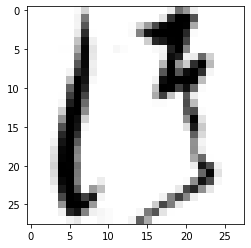

LABEL: 3


Plot of a sample that has really the label 2 (for comparison):
INPUT:


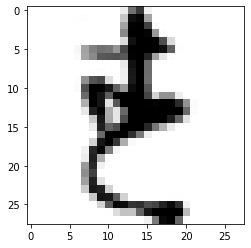

LABEL: 2


In [15]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)

# show the first 20 elements of the predictions to compare
print("First 20 elements of the true labels and of the predictions:")
print("NN predictions =\t", NN_prediction[:20])
print("large_NN predictions =\t", large_NN_prediction[:20])
print("True labels =\t\t", y_test[:20])

# find misclassified index
mis_mask = list((large_NN_prediction==y_test) & (NN_prediction!=y_test))
mis_index = mis_mask.index(True)

# plot the misclassified index of the linear regression
print("\nTaking the sample at index %i:" % mis_index)
print("Label predicted by NN:\t\t %i" % NN_prediction[mis_index])
print("Label predicted by large_NN:\t %i" % large_NN_prediction[mis_index])
print("Real label:\t\t\t %i \n" % y_test[mis_index])

print("\nPlot of the sample that creates confusion")
plot_input(X_test,y_test,mis_index)

print("\n\nPlot of a sample that has really the label %i (for comparison):" % NN_prediction[mis_index])
plot_input(X_test,y_test,list(y_test).index(NN_prediction[mis_index]))

### DONE 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


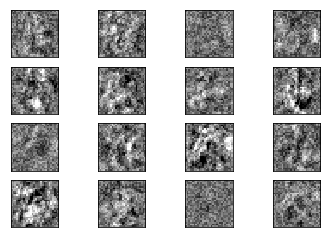

Weights with 4000 data points:


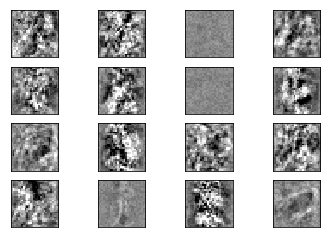

In [16]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5 (DONE)

Describe what do you observe by looking at the weights.

**It is difficult to interpret the images here. The only difference that I can spot among these two sets of weights is that the set with `m_training=600` shows less defined weights w.r.t. the set with `m_training=4000`.<br>
This could be caused by the larger number of samples used for training in the second set, because a larger number of training samples makes the training algorithm to be evaluated more times. The pattern of each image starts to be recognizable when `m_training=600`, but with more training samples it becomes more defined. So, it is more common to see white spots (that corresponds to weights near to the minimum in that colormap) in the images below than in the images above (where grey is more common).<br>
However, there are a few exceptions. Some weights in the set below are completely grey and no pattern emerges, while their corresponding images in the set above show some pattern (even if it's not weel defined).**

### DONE 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores (**did you mean 'errors'?**). Then fit also a logistic regression model with C=1.<br>
**I changed the default number of training samples to `m_training = 4000` otherwise the comparison in QUESTION 6 would have been unfair.**  

In [17]:
m_training = 4000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
SVM = SVC(kernel="rbf", C=10, gamma=0.01)
SVM.fit(X_train,y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1 - SVM.score(X_train,y_train)

print("Training error SVM:")
print(SVM_training_error)

SVM_test_error = 1 - SVM.score(X_test,y_test)
print("Test error SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training error SVM:
0.0
Test error SVM:
0.08799999999999997


In [18]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1, max_iter=1e3)
regL2.fit(X_train,y_train)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error =  1 - regL2.score(X_train,y_train)
test_error =  1 - regL2.score(X_test,y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.015000
Test error (reg): 0.241250


## QUESTION 6 (DONE)
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

**The following comparisons are made considering `m_training = 4000`.<br>
Logistic Regression with regularization achieved `training_error = 0.015000` and `test_error = 0.241250`.<br>
SVM achieved `training_error = 0.0` exactly and `test_error = 0.088000`.<br>
NN achieved `training_error = 0.014250` exactly and `test_error = 0.156339`.<br>
In this classification problem the SVM classifier is the best performing one (both during training and testing). But it also needs more computational time to be trained.**